# Music Streaming Trends Analysis (2018-2024)

**Objective**: Analyze global music streaming trends to identify patterns and develop strategic recommendations for the music industry.

## Structure:
1. **Data Preparation** - Load, clean, and prepare data for analysis
2. **Exploratory Data Analysis** - Discover patterns and trends in streaming behavior
3. **Music Industry Strategy** - Develop actionable recommendations based on insights

---

## 1. Data Preparation

Load and prepare the music streaming dataset for analysis.

In [14]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Configure plotting
plt.style.use('default')
sns.set_palette('husl')

print("Libraries imported successfully!")

Libraries imported successfully!


In [15]:
# Load dataset
df = pd.read_csv('../data/Global_Music_Streaming_Listener_Preferences.csv')

print(f"Dataset loaded: {df.shape[0]} rows, {df.shape[1]} columns")

Dataset loaded: 5000 rows, 12 columns


In [ ]:
# Basic data overview
print("=== DATA OVERVIEW ===")
print(f"Shape: {df.shape}")
print(f"\nData types:")
print(df.dtypes)
print(f"\nFirst few rows:")
df.head()

In [4]:
# Data quality check
print("=== DATA QUALITY ASSESSMENT ===")
print(f"\nMissing values:")
missing_data = df.isnull().sum()
print(missing_data[missing_data > 0])

print(f"\nDuplicate rows: {df.duplicated().sum()}")

# Basic statistics
print(f"\nNumerical columns summary:")
df.describe()

=== DATA QUALITY ASSESSMENT ===

Missing values:
Series([], dtype: int64)

Duplicate rows: 0

Numerical columns summary:


,Age,Minutes Streamed Per Day,Number of Songs Liked,Discover Weekly Engagement (%),Repeat Song Rate (%)
count,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,36.664000,309.237200,253.51720,50.296464,42.391060
std,13.763844,172.029822,146.36928,23.171936,21.444121
min,13.000000,10.000000,1.00000,10.020000,5.000000
25%,25.000000,161.000000,126.00000,30.147500,24.195000
50%,37.000000,316.000000,254.00000,50.420000,41.960000
75%,49.000000,457.250000,382.00000,70.337500,60.740000
max,60.000000,600.000000,500.00000,89.990000,79.990000


In [ ]:
# Data cleaning and preparation
print("=== DATA CLEANING ===")

# Handle missing values if any
if df.isnull().sum().sum() > 0:
    print("Handling missing values...")
    # Add your cleaning logic here based on the actual data
    
# Remove duplicates if any
if df.duplicated().sum() > 0:
    df = df.drop_duplicates()
    print(f"Removed {df.duplicated().sum()} duplicate rows")

# Data type conversions if needed
# Add any necessary data type conversions here

print(f"\nCleaned dataset: {df.shape[0]} rows, {df.shape[1]} columns")
print("Data preparation completed!")

## 2. Exploratory Data Analysis (EDA)

Analyze streaming patterns, user behavior, and trends to understand the music streaming landscape.

In [5]:
# Interactive Age-based Bar Chart Analysis
print("=== INTERACTIVE AGE-BASED ANALYSIS ===")

# Create age groups for analysis
df['Age_Group'] = pd.cut(df['Age'], 
                        bins=[0, 25, 41, 100], 
                        labels=['Gen Z (13-25)', 'Millennials (26-41)', 'Gen X (42-60)'])

# Define color mapping for generations
generation_colors = {
    'Gen Z (13-25)': '#FF6B6B',      # Red
    'Millennials (26-41)': '#4ECDC4', # Teal
    'Gen X (42-60)': '#45B7D1'       # Blue
}

# Get all quantitative variables available in the dataset
quantitative_vars = ['Minutes Streamed Per Day', 'Number of Songs Liked', 
                    'Discover Weekly Engagement (%)', 'Repeat Song Rate (%)']

# Filter only variables that exist in the dataset
available_vars = [var for var in quantitative_vars if var in df.columns]

if available_vars:
    # Prepare data for individual ages (13-60)
    age_data = []
    
    for age in range(13, 61):  # Ages 13 to 60
        age_subset = df[df['Age'] == age]
        if len(age_subset) > 0:
            # Determine generation for this age
            if age <= 25:
                generation = 'Gen Z (13-25)'
                color = generation_colors['Gen Z (13-25)']
            elif age <= 41:
                generation = 'Millennials (26-41)'
                color = generation_colors['Millennials (26-41)']
            else:
                generation = 'Gen X (42-60)'
                color = generation_colors['Gen X (42-60)']
            
            # Calculate mean values for each quantitative variable
            age_stats = {
                'Age': age, 
                'Generation': generation, 
                'Color': color,
                'Count': len(age_subset)
            }
            for var in available_vars:
                age_stats[var] = age_subset[var].mean()
            
            age_data.append(age_stats)
    
    # Convert to DataFrame
    age_df = pd.DataFrame(age_data)
    
    # Create interactive bar chart
    fig = go.Figure()
    
    # Add bar traces for each variable
    for i, var in enumerate(available_vars):
        fig.add_trace(go.Bar(
            x=age_df['Age'],
            y=age_df[var],
            name=var,
            marker=dict(
                color=age_df['Color'],
                line=dict(color='white', width=1),
                opacity=0.8
            ),
            visible=True if i == 0 else False,  # Only first variable visible initially
            hovertemplate='<b>Age %{x}</b><br>' +
                         f'{var}: %{{y:.1f}}<br>' +
                         'Generation: %{customdata[0]}<br>' +
                         'Sample Size: %{customdata[1]}<br>' +
                         '<extra></extra>',
            customdata=list(zip(age_df['Generation'], age_df['Count']))
        ))
    
    # Create dropdown buttons for variable selection
    buttons = []
    for i, var in enumerate(available_vars):
        # Create visibility array (only show the selected variable)
        visible_array = [False] * len(available_vars)
        visible_array[i] = True
        
        buttons.append(dict(
            args=[{"visible": visible_array}],
            label=var,
            method="restyle"
        ))
    
    # Update layout
    fig.update_layout(
        title=dict(
            text=f"Music Streaming Analysis by Individual Age<br><sub>{available_vars[0]} Distribution</sub>",
            font=dict(size=16)
        ),
        xaxis=dict(
            title="Age (Years)",
            tickmode='linear',
            tick0=13,
            dtick=1,  # Show every age
            range=[12.5, 60.5],
            gridcolor='lightgray',
            gridwidth=0.5,
            tickangle=45
        ),
        yaxis=dict(
            title=available_vars[0],
            gridcolor='lightgray',
            gridwidth=0.5
        ),
        updatemenus=[
            dict(
                buttons=buttons,
                direction="down",
                pad={"r": 10, "t": 10},
                showactive=True,
                x=0.02,
                xanchor="left",
                y=1.15,
                yanchor="top",
                bgcolor="rgba(255,255,255,0.9)",
                bordercolor="gray",
                borderwidth=1
            ),
        ],
        annotations=[
            dict(
                text="Select Variable:",
                showarrow=False,
                x=0.02, y=1.18,
                xref="paper", yref="paper",
                align="left",
                font=dict(size=12, color="black")
            )
        ],
        height=600,
        showlegend=False,
        plot_bgcolor='white',
        font=dict(size=11),
        margin=dict(b=100)  # Extra bottom margin for rotated age labels
    )
    
    # Add generation background bands
    fig.add_vrect(x0=12.5, x1=25.5, fillcolor=generation_colors['Gen Z (13-25)'], 
                  opacity=0.1, layer="below", line_width=0,
                  annotation_text="Gen Z", annotation_position="top left")
    fig.add_vrect(x0=25.5, x1=41.5, fillcolor=generation_colors['Millennials (26-41)'], 
                  opacity=0.1, layer="below", line_width=0,
                  annotation_text="Millennials", annotation_position="top")
    fig.add_vrect(x0=41.5, x1=60.5, fillcolor=generation_colors['Gen X (42-60)'], 
                  opacity=0.1, layer="below", line_width=0,
                  annotation_text="Gen X", annotation_position="top right")
    
    # Add callback to update title and y-axis when dropdown changes
    for i, var in enumerate(available_vars):
        if i > 0:  # Skip first variable as it's already set
            fig.data[i].on_click = lambda trace, points, selector: fig.update_layout(
                title=f"Music Streaming Analysis by Individual Age<br><sub>{var} Distribution</sub>",
                yaxis_title=var
            )
    
    fig.show()
    
    # Print summary statistics
    print(f"\n=== SUMMARY STATISTICS ===")
    print(f"Age Range Analyzed: {age_df['Age'].min()} - {age_df['Age'].max()} years")
    print(f"Total Individual Ages: {len(age_df)} ages represented")
    print(f"Available Variables: {len(available_vars)} quantitative metrics")
    
    # Generation breakdown
    print(f"\n=== GENERATION BREAKDOWN ===")
    for generation in ['Gen Z (13-25)', 'Millennials (26-41)', 'Gen X (42-60)']:
        gen_ages = age_df[age_df['Generation'] == generation]
        total_users = gen_ages['Count'].sum()
        avg_age = gen_ages['Age'].mean()
        print(f"🎯 {generation}:")
        print(f"   Ages Represented: {len(gen_ages)} individual ages")
        print(f"   Total Users: {total_users:,}")
        print(f"   Average Age: {avg_age:.1f} years")
        print()
    
    # Variable statistics
    print(f"=== VARIABLE RANGES ===")
    for var in available_vars[:3]:  # Show first 3 variables
        min_val = age_df[var].min()
        max_val = age_df[var].max()
        mean_val = age_df[var].mean()
        print(f"📊 {var}: {min_val:.1f} - {max_val:.1f} (avg: {mean_val:.1f})")

else:
    print("❌ No quantitative variables found for analysis")

=== INTERACTIVE AGE-BASED ANALYSIS ===



=== SUMMARY STATISTICS ===
Age Range Analyzed: 13 - 60 years
Total Individual Ages: 48 ages represented
Available Variables: 4 quantitative metrics

=== GENERATION BREAKDOWN ===
🎯 Gen Z (13-25):
   Ages Represented: 13 individual ages
   Total Users: 1,311
   Average Age: 19.0 years

🎯 Millennials (26-41):
   Ages Represented: 16 individual ages
   Total Users: 1,703
   Average Age: 33.5 years

🎯 Gen X (42-60):
   Ages Represented: 19 individual ages
   Total Users: 1,986
   Average Age: 51.0 years

=== VARIABLE RANGES ===
📊 Minutes Streamed Per Day: 278.2 - 348.0 (avg: 309.6)
📊 Number of Songs Liked: 222.6 - 289.2 (avg: 253.4)
📊 Discover Weekly Engagement (%): 45.0 - 55.1 (avg: 50.3)


In [6]:
# Interactive Country-based Analysis with Flags
print("=== INTERACTIVE COUNTRY ANALYSIS ===")

# Country flags dictionary
country_flags = {
    'Canada': '🇨🇦',
    'Australia': '🇦🇺',
    'Germany': '🇩🇪',
    'France': '🇫🇷',
    'Spain': '🇪🇸',
    'Italy': '🇮🇹',
    'Netherlands': '🇳🇱',
    'Sweden': '🇸🇪',
    'Norway': '🇳🇴',
    'Denmark': '🇩🇰',
    'Finland': '🇫🇮',
    'Brazil': '🇧🇷',
    'Mexico': '🇲🇽',
    'Argentina': '🇦🇷',
    'Japan': '🇯🇵',
    'South Korea': '🇰🇷',
    'India': '🇮🇳',
    'China': '🇨🇳',
    'Russia': '🇷🇺',
    'Poland': '🇵🇱',
    'Belgium': '🇧🇪',
    'Switzerland': '🇨🇭',
    'Austria': '🇦🇹',
    'Portugal': '🇵🇹',
    'Ireland': '🇮🇪',
    'New Zealand': '🇳🇿',
    'South Africa': '🇿🇦',
    'Chile': '🇨🇱',
    'Colombia': '🇨🇴',
    'Peru': '🇵🇪',
    'Turkey': '🇹🇷',
    'Greece': '🇬🇷',
    'Czech Republic': '🇨🇿',
    'Hungary': '🇭🇺',
    'Romania': '🇷🇴',
    'Thailand': '🇹🇭',
    'Vietnam': '🇻🇳',
    'Philippines': '🇵🇭',
    'Indonesia': '🇮🇩',
    'Malaysia': '🇲🇾',
    'Singapore': '🇸🇬',
    'Israel': '🇮🇱',
    'UAE': '🇦🇪',
    'Saudi Arabia': '🇸🇦',
    'Egypt': '🇪🇬',
    'Nigeria': '🇳🇬',
    'Kenya': '🇰🇪',
    'Morocco': '🇲🇦',
    'USA': '🇺🇸',
    'UK': '🇬🇧'
}

# Check if Country column exists
if 'Country' in df.columns:
    # Get all quantitative variables available in the dataset
    quantitative_vars = ['Minutes Streamed Per Day', 'Number of Songs Liked', 
                        'Discover Weekly Engagement (%)', 'Repeat Song Rate (%)']
    
    # Filter only variables that exist in the dataset
    available_vars = [var for var in quantitative_vars if var in df.columns]
    
    if available_vars:
        # Prepare data by country
        country_data = []
        countries = df['Country'].unique()
        
        # Define color palette for countries
        import plotly.colors as pc
        colors = pc.qualitative.Set3 + pc.qualitative.Pastel + pc.qualitative.Set1
        
        for i, country in enumerate(countries):
            country_subset = df[df['Country'] == country]
            if len(country_subset) > 0:
                # Get flag for country, default to 🌍 if not found
                flag = country_flags.get(country, '🌍')
                color = colors[i % len(colors)]
                
                # Calculate mean values for each quantitative variable
                country_stats = {
                    'Country': country,
                    'Flag': flag,
                    'Country_Flag': f"{country} {flag}",
                    'Color': color,
                    'Count': len(country_subset)
                }
                for var in available_vars:
                    country_stats[var] = country_subset[var].mean()
                
                country_data.append(country_stats)
        
        # Convert to DataFrame and sort by first variable descending
        country_df = pd.DataFrame(country_data)
        country_df = country_df.sort_values(available_vars[0], ascending=False)
        
        # Create interactive bar chart
        fig = go.Figure()
        
        # Add bar traces for each variable
        for i, var in enumerate(available_vars):
            # Sort data by current variable for better visualization
            sorted_df = country_df.sort_values(var, ascending=False)
            
            fig.add_trace(go.Bar(
                x=sorted_df['Country_Flag'],
                y=sorted_df[var],
                name=var,
                marker=dict(
                    color=sorted_df['Color'],
                    line=dict(color='white', width=1),
                    opacity=0.8
                ),
                visible=True if i == 0 else False,  # Only first variable visible initially
                hovertemplate='<b>%{x}</b><br>' +
                             f'{var}: %{{y:.1f}}<br>' +
                             'Sample Size: %{customdata}<br>' +
                             '<extra></extra>',
                customdata=sorted_df['Count']
            ))
        
        # Create dropdown buttons for variable selection
        buttons = []
        for i, var in enumerate(available_vars):
            # Create visibility array (only show the selected variable)
            visible_array = [False] * len(available_vars)
            visible_array[i] = True
            
            # Sort data by current variable for the button
            sorted_df = country_df.sort_values(var, ascending=False)
            
            buttons.append(dict(
                args=[{
                    "visible": visible_array,
                    "x": [sorted_df['Country_Flag']],
                    "y": [sorted_df[var]],
                    "customdata": [sorted_df['Count']]
                }],
                label=var,
                method="restyle"
            ))
        
        # Update layout
        fig.update_layout(
            title=dict(
                text=f"Music Streaming Analysis by Country<br><sub>{available_vars[0]} Distribution</sub>",
                font=dict(size=16)
            ),
            xaxis=dict(
                title="Countries",
                tickangle=45,
                gridcolor='lightgray',
                gridwidth=0.5
            ),
            yaxis=dict(
                title=available_vars[0],
                gridcolor='lightgray',
                gridwidth=0.5
            ),
            updatemenus=[
                dict(
                    buttons=buttons,
                    direction="down",
                    pad={"r": 10, "t": 10},
                    showactive=True,
                    x=0.02,
                    xanchor="left",
                    y=1.15,
                    yanchor="top",
                    bgcolor="rgba(255,255,255,0.9)",
                    bordercolor="gray",
                    borderwidth=1
                ),
            ],
            annotations=[
                dict(
                    text="Select Variable:",
                    showarrow=False,
                    x=0.02, y=1.18,
                    xref="paper", yref="paper",
                    align="left",
                    font=dict(size=12, color="black")
                )
            ],
            height=600,
            showlegend=False,
            plot_bgcolor='white',
            font=dict(size=11),
            margin=dict(b=120, l=80, r=80)  # Extra margins for country names and flags
        )
        
        fig.show()
        
        # Print summary statistics
        print(f"\n=== COUNTRY ANALYSIS SUMMARY ===")
        print(f"Total Countries: {len(country_df)}")
        print(f"Available Variables: {len(available_vars)} quantitative metrics")
        
        # Top 5 countries by first variable
        print(f"\n=== TOP 5 COUNTRIES BY {available_vars[0]} ===")
        top_countries = country_df.nlargest(5, available_vars[0])
        for idx, (_, row) in enumerate(top_countries.iterrows(), 1):
            print(f"{idx}. {row['Flag']} {row['Country']}: {row[available_vars[0]]:.1f}")
        
        # Countries with flags statistics
        countries_with_flags = sum(1 for country in countries if country in country_flags)
        print(f"\n=== FLAG STATISTICS ===")
        print(f"Countries with custom flags: {countries_with_flags}/{len(countries)}")
        print(f"Countries using default flag 🌍: {len(countries) - countries_with_flags}")
        
        # Variable statistics across countries
        print(f"\n=== VARIABLE RANGES ACROSS COUNTRIES ===")
        for var in available_vars:
            min_country = country_df.loc[country_df[var].idxmin()]
            max_country = country_df.loc[country_df[var].idxmax()]
            avg_val = country_df[var].mean()
            print(f"📊 {var}:")
            print(f"   Highest: {max_country['Flag']} {max_country['Country']} ({max_country[var]:.1f})")
            print(f"   Lowest: {min_country['Flag']} {min_country['Country']} ({min_country[var]:.1f})")
            print(f"   Average: {avg_val:.1f}")
            print()
    
    else:
        print("❌ No quantitative variables found for country analysis")
else:
    print("❌ 'Country' column not found in dataset")

=== INTERACTIVE COUNTRY ANALYSIS ===



=== COUNTRY ANALYSIS SUMMARY ===
Total Countries: 10
Available Variables: 4 quantitative metrics

=== TOP 5 COUNTRIES BY Minutes Streamed Per Day ===
1. 🇩🇪 Germany: 322.0
2. 🇫🇷 France: 318.6
3. 🇰🇷 South Korea: 316.2
4. 🇦🇺 Australia: 314.9
5. 🇬🇧 UK: 309.8

=== FLAG STATISTICS ===
Countries with custom flags: 10/10
Countries using default flag 🌍: 0

=== VARIABLE RANGES ACROSS COUNTRIES ===
📊 Minutes Streamed Per Day:
   Highest: 🇩🇪 Germany (322.0)
   Lowest: 🇧🇷 Brazil (293.7)
   Average: 309.2

📊 Number of Songs Liked:
   Highest: 🇨🇦 Canada (265.1)
   Lowest: 🇰🇷 South Korea (246.3)
   Average: 253.6

📊 Discover Weekly Engagement (%):
   Highest: 🇦🇺 Australia (51.5)
   Lowest: 🇬🇧 UK (48.6)
   Average: 50.3

📊 Repeat Song Rate (%):
   Highest: 🇧🇷 Brazil (43.7)
   Lowest: 🇩🇪 Germany (41.1)
   Average: 42.4



In [7]:
# Interactive Genre Analysis with Plotly Express
print("=== INTERACTIVE MUSIC GENRE ANALYSIS ===")

# Find genre-related columns
genre_cols = [col for col in df.columns if 'genre' in col.lower() or 'music' in col.lower()]
print(f"Genre-related columns: {genre_cols}")

if genre_cols:
    # Analyze genre preferences with interactive Plotly Express charts
    for col in genre_cols[:3]:  # Limit to first 3 genre columns
        if df[col].dtype == 'object':
            print(f"\n--- Analysis for {col} ---")
            
            # Get top 15 genres for better visualization
            genre_counts = df[col].value_counts().head(15)
            
            # Create DataFrame for Plotly
            genre_df = pd.DataFrame({
                'Genre': genre_counts.index,
                'Count': genre_counts.values,
                'Percentage': (genre_counts.values / len(df) * 100).round(1)
            })
            
            # Create interactive bar chart with Plotly Express
            fig = px.bar(genre_df, 
                        x='Genre', 
                        y='Count',
                        title=f'Top 15 {col} Distribution (Interactive)',
                        labels={'Count': 'Number of Users', 'Genre': col},
                        color='Count',
                        color_continuous_scale='viridis',
                        text='Count',
                        hover_data={'Percentage': True})
            
            # Update layout for better readability
            fig.update_traces(textposition='outside')
            fig.update_layout(
                xaxis_tickangle=-45,
                height=500,
                showlegend=False,
                xaxis=dict(gridcolor='lightgray'),
                yaxis=dict(gridcolor='lightgray'),
                plot_bgcolor='white'
            )
            
            fig.show()
            
            # Print summary statistics
            print(f"Top 5 {col}:")
            for i, (genre, count) in enumerate(genre_counts.head().items(), 1):
                percentage = (count / len(df) * 100)
                print(f"{i}. {genre}: {count:,} users ({percentage:.1f}%)")
            
            print(f"Total unique {col}: {df[col].nunique()}")
            print(f"Coverage of top 15: {genre_counts.head(15).sum() / len(df) * 100:.1f}% of users")

    # --- ADDITIONAL CHART: Genre Distribution by Country ---
    print("\n" + "="*60)
    print("=== GENRE PREFERENCES BY COUNTRY (INTERACTIVE) ===")
    
    if 'Country' in df.columns and genre_cols:
        main_genre_col = genre_cols[0]  # Use the first genre column
        
        # Country flags dictionary for the genre chart
        country_flags = {
            'Canada': '🇨🇦', 'Australia': '🇦🇺',
            'Germany': '🇩🇪', 'France': '🇫🇷', 'Spain': '🇪🇸', 'Italy': '🇮🇹', 'Netherlands': '🇳🇱',
            'Sweden': '🇸🇪', 'Norway': '🇳🇴', 'Denmark': '🇩🇰', 'Finland': '🇫🇮', 'Brazil': '🇧🇷',
            'Mexico': '🇲🇽', 'Argentina': '🇦🇷', 'Japan': '🇯🇵', 'South Korea': '🇰🇷', 'India': '🇮🇳',
            'China': '🇨🇳', 'Russia': '🇷🇺', 'Poland': '🇵🇱', 'Belgium': '🇧🇪', 'Switzerland': '🇨🇭',
            'Austria': '🇦🇹', 'Portugal': '🇵🇹', 'Ireland': '🇮🇪', 'New Zealand': '🇳🇿',
            'South Africa': '🇿🇦', 'Chile': '🇨🇱', 'Colombia': '🇨🇴', 'Peru': '🇵🇪', 'Turkey': '🇹🇷',
            'Greece': '🇬🇷', 'Czech Republic': '🇨🇿', 'Hungary': '🇭🇺', 'Romania': '🇷🇴',
            'Thailand': '🇹🇭', 'Vietnam': '🇻🇳', 'Philippines': '🇵🇭', 'Indonesia': '🇮🇩',
            'Malaysia': '🇲🇾', 'Singapore': '🇸🇬', 'Israel': '🇮🇱', 'UAE': '🇦🇪',
            'Saudi Arabia': '🇸🇦', 'Egypt': '🇪🇬', 'Nigeria': '🇳🇬', 'Kenya': '🇰🇪', 'Morocco': '🇲🇦',
            'USA': '🇺🇸', 'UK': '🇬🇧'
        }
        
        # Get top 10 countries and top 8 genres for manageable visualization
        top_countries = df['Country'].value_counts().head(10).index.tolist()
        top_genres = df[main_genre_col].value_counts().head(8).index.tolist()
        
        # Filter data for top countries and genres
        filtered_df = df[
            df['Country'].isin(top_countries) & 
            df[main_genre_col].isin(top_genres)
        ].copy()
        
        if not filtered_df.empty:
            # Create country-genre cross-tabulation
            country_genre_counts = filtered_df.groupby(['Country', main_genre_col]).size().reset_index(name='Count')
            
            # Calculate percentages within each country
            country_totals = filtered_df.groupby('Country').size().reset_index(name='Total')
            country_genre_counts = country_genre_counts.merge(country_totals, on='Country')
            country_genre_counts['Percentage'] = (country_genre_counts['Count'] / country_genre_counts['Total'] * 100).round(1)
            
            # Add country flags to country names
            country_genre_counts['Country_Flag'] = country_genre_counts['Country'].apply(
                lambda x: f"{country_flags.get(x, '🌍')} {x}"
            )
            
            # Create interactive grouped bar chart
            fig_country = px.bar(
                country_genre_counts,
                x='Country_Flag',
                y='Percentage',
                color=main_genre_col,
                title=f'{main_genre_col} Preferences by Country (Top 10 Countries, Top 8 Genres)',
                labels={'Percentage': 'Percentage of Users (%)', 'Country_Flag': 'Country'},
                barmode='group',
                hover_data={'Count': True, 'Total': True, 'Country': True}
            )
            
            # Update layout
            fig_country.update_layout(
                xaxis_tickangle=-45,
                height=600,
                legend=dict(
                    orientation="v",
                    yanchor="top",
                    y=1,
                    xanchor="left",
                    x=1.02
                ),
                xaxis=dict(gridcolor='lightgray'),
                yaxis=dict(gridcolor='lightgray'),
                plot_bgcolor='white',
                margin=dict(r=150)  # Extra margin for legend
            )
            
            fig_country.show()
            
            # Print country-genre insights
            print(f"\n=== TOP GENRE BY COUNTRY ===")
            for country in top_countries:
                country_data = country_genre_counts[country_genre_counts['Country'] == country]
                if not country_data.empty:
                    top_genre_row = country_data.loc[country_data['Percentage'].idxmax()]
                    flag = country_flags.get(country, '🌍')
                    print(f"{flag} {country}: {top_genre_row[main_genre_col]} ({top_genre_row['Percentage']:.1f}%)")
            
            # Genre diversity by country
            print(f"\n=== GENRE DIVERSITY BY COUNTRY ===")
            genre_diversity = filtered_df.groupby('Country')[main_genre_col].nunique().sort_values(ascending=False)
            for country, diversity in genre_diversity.head().items():
                total_users = filtered_df[filtered_df['Country'] == country].shape[0]
                flag = country_flags.get(country, '🌍')
                print(f"{flag} {country}: {diversity} different genres among {total_users:,} users")
        
        else:
            print("❌ Insufficient data for country-genre analysis after filtering.")
    
    else:
        if 'Country' not in df.columns:
            print("❌ 'Country' column not found for country-genre analysis.")
        if not genre_cols:
            print("❌ No genre columns found for country-genre analysis.")

else:
    print("❌ No genre-related columns found in the dataset.")

=== INTERACTIVE MUSIC GENRE ANALYSIS ===
Genre-related columns: ['Top Genre']

--- Analysis for Top Genre ---


Top 5 Top Genre:
1. Reggae: 532 users (10.6%)
2. Jazz: 532 users (10.6%)
3. EDM: 528 users (10.6%)
4. Rock: 516 users (10.3%)
5. R&B: 495 users (9.9%)
Total unique Top Genre: 10
Coverage of top 15: 100.0% of users

=== GENRE PREFERENCES BY COUNTRY (INTERACTIVE) ===



=== TOP GENRE BY COUNTRY ===
🇦🇺 Australia: Jazz (14.4%)
🇰🇷 South Korea: Rock (14.7%)
🇬🇧 UK: Reggae (14.9%)
🇧🇷 Brazil: Rock (15.5%)
🇨🇦 Canada: EDM (14.3%)
🇫🇷 France: Jazz (14.2%)
🇯🇵 Japan: Jazz (14.6%)
🇮🇳 India: Reggae (15.7%)
🇺🇸 USA: EDM (15.1%)
🇩🇪 Germany: EDM (18.3%)

=== GENRE DIVERSITY BY COUNTRY ===
🇦🇺 Australia: 8 different genres among 418 users
🇧🇷 Brazil: 8 different genres among 393 users
🇨🇦 Canada: 8 different genres among 414 users
🇫🇷 France: 8 different genres among 416 users
🇩🇪 Germany: 8 different genres among 389 users


In [8]:
# Interactive Listening Time Preferences Analysis
print("=== INTERACTIVE LISTENING TIME PREFERENCES ANALYSIS ===")

# Check if listening time column exists
listening_time_col = 'Listening Time (Morning/Afternoon/Night)'

if listening_time_col in df.columns:
    
    # === GLOBAL ANALYSIS ===
    print("\n🌍 GLOBAL LISTENING TIME PREFERENCES")
    
    # Get global listening time distribution
    global_listening = df[listening_time_col].value_counts()
    global_percentages = (global_listening / len(df) * 100).round(1)
    
    # Create DataFrame for plotting
    global_df = pd.DataFrame({
        'Time_Period': global_listening.index,
        'Count': global_listening.values,
        'Percentage': global_percentages.values
    })
    
    # Define colors for time periods
    time_colors = {
        'Morning': '#FFD700',    # Gold
        'Afternoon': '#FF8C00',  # Dark Orange
        'Night': '#4169E1'       # Royal Blue
    }
    
    # Create interactive pie chart for global analysis (fixed hover_data issue)
    fig_global = px.pie(
        global_df, 
        values='Count', 
        names='Time_Period',
        title='Global Music Listening Preferences by Time of Day',
        color='Time_Period',
        color_discrete_map=time_colors
    )
    
    # Update pie chart layout
    fig_global.update_traces(
        textposition='inside', 
        textinfo='percent+label',
        hovertemplate='<b>%{label}</b><br>' +
                     'Users: %{value:,}<br>' +
                     'Percentage: %{percent}<br>' +
                     '<extra></extra>'
    )
    
    fig_global.update_layout(
        font=dict(size=12),
        height=500,
        showlegend=True,
        legend=dict(orientation="h", yanchor="bottom", y=-0.1, xanchor="center", x=0.5)
    )
    
    fig_global.show()
    
    # Print global insights
    print(f"\n=== GLOBAL INSIGHTS ===")
    for time_period, count in global_listening.items():
        percentage = global_percentages[time_period]
        print(f"🎵 {time_period}: {count:,} users ({percentage}%)")
    
    print(f"\n📊 Most popular listening time: {global_listening.index[0]} ({global_percentages.iloc[0]}%)")
    print(f"📊 Least popular listening time: {global_listening.index[-1]} ({global_percentages.iloc[-1]}%)")
    
    # === COUNTRY-SPECIFIC ANALYSIS ===
    print("\n" + "="*60)
    print("🌎 LISTENING TIME PREFERENCES BY COUNTRY")
    
    if 'Country' in df.columns:
        # Get top 10 countries by user count
        top_countries = df['Country'].value_counts().head(10).index.tolist()
        
        # Country flags dictionary
        country_flags = {
            'United States': '🇺🇸', 'United Kingdom': '🇬🇧', 'Canada': '🇨🇦', 'Australia': '🇦🇺',
            'Germany': '🇩🇪', 'France': '🇫🇷', 'Spain': '🇪🇸', 'Italy': '🇮🇹', 'Netherlands': '🇳🇱',
            'Sweden': '🇸🇪', 'Norway': '🇳🇴', 'Denmark': '🇩🇰', 'Finland': '🇫🇮', 'Brazil': '🇧🇷',
            'Mexico': '🇲🇽', 'Argentina': '🇦🇷', 'Japan': '🇯🇵', 'South Korea': '🇰🇷', 'India': '🇮🇳',
            'China': '🇨🇳', 'Russia': '🇷🇺', 'Poland': '🇵🇱', 'Belgium': '🇧🇪', 'Switzerland': '🇨🇭',
            'Austria': '🇦🇹', 'Portugal': '🇵🇹', 'Ireland': '🇮🇪', 'New Zealand': '🇳🇿',
            'South Africa': '🇿🇦', 'Chile': '🇨🇱', 'Colombia': '🇨🇴', 'Peru': '🇵🇪', 'Turkey': '🇹🇷',
            'Greece': '🇬🇷', 'Czech Republic': '🇨🇿', 'Hungary': '🇭🇺', 'Romania': '🇷🇴',
            'Thailand': '🇹🇭', 'Vietnam': '🇻🇳', 'Philippines': '🇵🇭', 'Indonesia': '🇮🇩',
            'Malaysia': '🇲🇾', 'Singapore': '🇸🇬', 'Israel': '🇮🇱', 'UAE': '🇦🇪',
            'Saudi Arabia': '🇸🇦', 'Egypt': '🇪🇬', 'Nigeria': '🇳🇬', 'Kenya': '🇰🇪', 'Morocco': '🇲🇦',
            'USA': '🇺🇸', 'UK': '🇬🇧'
        }
        
        # Filter data for top countries
        country_filtered_df = df[df['Country'].isin(top_countries)].copy()
        
        if not country_filtered_df.empty:
            # Create country-time cross-tabulation
            country_time_counts = country_filtered_df.groupby(['Country', listening_time_col]).size().reset_index(name='Count')
            
            # Calculate percentages within each country
            country_totals = country_filtered_df.groupby('Country').size().reset_index(name='Total')
            country_time_counts = country_time_counts.merge(country_totals, on='Country')
            country_time_counts['Percentage'] = (country_time_counts['Count'] / country_time_counts['Total'] * 100).round(1)
            
            # Add country flags
            country_time_counts['Country_Flag'] = country_time_counts['Country'].apply(
                lambda x: f"{country_flags.get(x, '🌍')} {x}"
            )
            
            # Create interactive grouped bar chart
            fig_country = px.bar(
                country_time_counts,
                x='Country_Flag',
                y='Percentage',
                color=listening_time_col,
                title='Music Listening Time Preferences by Country (Top 10 Countries)',
                labels={'Percentage': 'Percentage of Users (%)', 'Country_Flag': 'Country'},
                color_discrete_map=time_colors,
                barmode='group'
            )
            
            # Update layout
            fig_country.update_layout(
                xaxis_tickangle=-45,
                height=600,
                legend=dict(
                    title="Listening Time",
                    orientation="h",
                    yanchor="bottom",
                    y=-0.15,
                    xanchor="center",
                    x=0.5
                ),
                xaxis=dict(gridcolor='lightgray'),
                yaxis=dict(gridcolor='lightgray'),
                plot_bgcolor='white',
                margin=dict(b=120)  # Extra margin for country names and legend
            )
            
            fig_country.show()
            
            # Print country-specific insights
            print(f"\n=== TOP LISTENING TIME BY COUNTRY ===")
            for country in top_countries:
                country_data = country_time_counts[country_time_counts['Country'] == country]
                if not country_data.empty:
                    top_time_row = country_data.loc[country_data['Percentage'].idxmax()]
                    flag = country_flags.get(country, '🌍')
                    print(f"{flag} {country}: {top_time_row[listening_time_col]} ({top_time_row['Percentage']:.1f}%)")
            
            # Time period dominance by country
            print(f"\n=== TIME PERIOD ANALYSIS ===")
            for time_period in ['Morning', 'Afternoon', 'Night']:
                time_data = country_time_counts[country_time_counts[listening_time_col] == time_period]
                if not time_data.empty:
                    top_country_row = time_data.loc[time_data['Percentage'].idxmax()]
                    flag = country_flags.get(top_country_row['Country'], '🌍')
                    print(f"🎵 {time_period} leaders: {flag} {top_country_row['Country']} ({top_country_row['Percentage']:.1f}%)")
            
            # Country diversity in listening times
            print(f"\n=== LISTENING TIME DIVERSITY BY COUNTRY ===")
            time_diversity = country_filtered_df.groupby('Country')[listening_time_col].nunique().sort_values(ascending=False)
            for country, diversity in time_diversity.head().items():
                total_users = country_filtered_df[country_filtered_df['Country'] == country].shape[0]
                flag = country_flags.get(country, '🌍')
                if diversity == 3:
                    diversity_text = "All time periods"
                elif diversity == 2:
                    diversity_text = "2 time periods"
                else:
                    diversity_text = "1 time period"
                print(f"{flag} {country}: {diversity_text} among {total_users:,} users")
        
        else:
            print("❌ Insufficient data for country-time analysis after filtering.")
    
    else:
        print("❌ 'Country' column not found for country-specific analysis.")
    
    # === AGE-BASED ANALYSIS (THIRD CHART) ===
    print("\n" + "="*60)
    print("👥 LISTENING TIME PREFERENCES BY AGE AND GENERATION")
    
    if 'Age' in df.columns:
        # Define generation colors
        generation_colors = {
            'Gen Z (13-25)': '#FF6B6B',      # Red
            'Millennials (26-41)': '#4ECDC4', # Teal
            'Gen X (42-60)': '#45B7D1'       # Blue
        }
        
        # Get available time periods
        time_periods = ['Morning', 'Afternoon', 'Night']
        available_time_periods = [t for t in time_periods if t in df[listening_time_col].unique()]
        
        if available_time_periods:
            # Prepare data for individual ages by generation and time period
            age_time_data = []
            
            for age in range(13, 61):  # Ages 13 to 60
                age_subset = df[df['Age'] == age]
                if len(age_subset) > 0:
                    # Determine generation for this age
                    if age <= 25:
                        generation = 'Gen Z (13-25)'
                        color = generation_colors['Gen Z (13-25)']
                    elif age <= 41:
                        generation = 'Millennials (26-41)'
                        color = generation_colors['Millennials (26-41)']
                    else:
                        generation = 'Gen X (42-60)'
                        color = generation_colors['Gen X (42-60)']
                    
                    # Count users by time period for this age
                    age_time_counts = age_subset[listening_time_col].value_counts()
                    
                    for time_period in available_time_periods:
                        count = age_time_counts.get(time_period, 0)
                        age_time_data.append({
                            'Age': age,
                            'Generation': generation,
                            'Color': color,
                            'Time_Period': time_period,
                            'Count': count,
                            'Total_Age_Users': len(age_subset)
                        })
            
            # Convert to DataFrame
            age_time_df = pd.DataFrame(age_time_data)
            
            # Create interactive grouped bar chart similar to cell 9
            fig_age = go.Figure()
            
            # Add bar traces for each time period
            for i, time_period in enumerate(available_time_periods):
                time_data = age_time_df[age_time_df['Time_Period'] == time_period]
                
                fig_age.add_trace(go.Bar(
                    x=time_data['Age'],
                    y=time_data['Count'],
                    name=time_period,
                    marker=dict(
                        color=time_colors.get(time_period, '#999999'),
                        line=dict(color='white', width=1),
                        opacity=0.8
                    ),
                    visible=True,  # All time periods visible initially
                    hovertemplate='<b>Age %{x}</b><br>' +
                                 f'{time_period}: %{{y}} users<br>' +
                                 'Generation: %{customdata[0]}<br>' +
                                 'Total Users at Age: %{customdata[1]}<br>' +
                                 '<extra></extra>',
                    customdata=list(zip(time_data['Generation'], time_data['Total_Age_Users']))
                ))
            
            # Update layout
            fig_age.update_layout(
                title=dict(
                    text="Music Listening Time Preferences by Individual Age<br><sub>Count of Users by Time Period and Generation</sub>",
                    font=dict(size=16)
                ),
                xaxis=dict(
                    title="Age (Years)",
                    tickmode='linear',
                    tick0=13,
                    dtick=1,  # Show every age
                    range=[12.5, 60.5],
                    gridcolor='lightgray',
                    gridwidth=0.5,
                    tickangle=45
                ),
                yaxis=dict(
                    title="Number of Users",
                    gridcolor='lightgray',
                    gridwidth=0.5
                ),
                height=600,
                barmode='group',
                plot_bgcolor='white',
                font=dict(size=11),
                margin=dict(b=100),  # Extra bottom margin for rotated age labels
                legend=dict(
                    title="Listening Time",
                    orientation="h",
                    yanchor="bottom",
                    y=-0.15,
                    xanchor="center",
                    x=0.5
                )
            )
            
            # Add generation background bands
            fig_age.add_vrect(x0=12.5, x1=25.5, fillcolor=generation_colors['Gen Z (13-25)'], 
                              opacity=0.1, layer="below", line_width=0,
                              annotation_text="Gen Z", annotation_position="top left")
            fig_age.add_vrect(x0=25.5, x1=41.5, fillcolor=generation_colors['Millennials (26-41)'], 
                              opacity=0.1, layer="below", line_width=0,
                              annotation_text="Millennials", annotation_position="top")
            fig_age.add_vrect(x0=41.5, x1=60.5, fillcolor=generation_colors['Gen X (42-60)'], 
                              opacity=0.1, layer="below", line_width=0,
                              annotation_text="Gen X", annotation_position="top right")
            
            fig_age.show()
            
            # Print age-based insights
            print(f"\n=== AGE-BASED LISTENING TIME INSIGHTS ===")
            
            # Generation breakdown by time period
            for generation in ['Gen Z (13-25)', 'Millennials (26-41)', 'Gen X (42-60)']:
                gen_data = age_time_df[age_time_df['Generation'] == generation]
                if not gen_data.empty:
                    gen_totals = gen_data.groupby('Time_Period')['Count'].sum()
                    total_gen_users = gen_data['Total_Age_Users'].sum()
                    
                    print(f"\n🎯 {generation} ({total_gen_users:,} total users):")
                    for time_period in available_time_periods:
                        count = gen_totals.get(time_period, 0)
                        percentage = (count / total_gen_users * 100) if total_gen_users > 0 else 0
                        print(f"   {time_period}: {count:,} users ({percentage:.1f}%)")
            
            # Find peak ages for each time period
            print(f"\n=== PEAK AGES BY TIME PERIOD ===")
            for time_period in available_time_periods:
                time_data = age_time_df[age_time_df['Time_Period'] == time_period]
                if not time_data.empty:
                    peak_age_row = time_data.loc[time_data['Count'].idxmax()]
                    print(f"🎵 {time_period} peak: Age {peak_age_row['Age']} ({peak_age_row['Count']} users, {peak_age_row['Generation']})")
        
        else:
            print("❌ No valid time periods found for age-based analysis.")
    
    else:
        print("❌ 'Age' column not found for age-based analysis.")

else:
    print("❌ No listening time preference column found in the dataset.")

=== INTERACTIVE LISTENING TIME PREFERENCES ANALYSIS ===

🌍 GLOBAL LISTENING TIME PREFERENCES



=== GLOBAL INSIGHTS ===
🎵 Night: 1,745 users (34.9%)
🎵 Afternoon: 1,634 users (32.7%)
🎵 Morning: 1,621 users (32.4%)

📊 Most popular listening time: Night (34.9%)
📊 Least popular listening time: Morning (32.4%)

🌎 LISTENING TIME PREFERENCES BY COUNTRY



=== TOP LISTENING TIME BY COUNTRY ===
🇦🇺 Australia: Night (35.4%)
🇰🇷 South Korea: Morning (35.5%)
🇬🇧 UK: Night (38.4%)
🇧🇷 Brazil: Night (36.2%)
🇨🇦 Canada: Night (35.5%)
🇫🇷 France: Night (36.9%)
🇯🇵 Japan: Morning (35.4%)
🇮🇳 India: Afternoon (35.9%)
🇺🇸 USA: Night (36.3%)
🇩🇪 Germany: Night (34.6%)

=== TIME PERIOD ANALYSIS ===
🎵 Morning leaders: 🇰🇷 South Korea (35.5%)
🎵 Afternoon leaders: 🇮🇳 India (35.9%)
🎵 Night leaders: 🇬🇧 UK (38.4%)

=== LISTENING TIME DIVERSITY BY COUNTRY ===
🇦🇺 Australia: All time periods among 526 users
🇧🇷 Brazil: All time periods among 508 users
🇨🇦 Canada: All time periods among 507 users
🇫🇷 France: All time periods among 493 users
🇩🇪 Germany: All time periods among 471 users

👥 LISTENING TIME PREFERENCES BY AGE AND GENERATION



=== AGE-BASED LISTENING TIME INSIGHTS ===

🎯 Gen Z (13-25) (3,933 total users):
   Morning: 418 users (10.6%)
   Afternoon: 444 users (11.3%)
   Night: 449 users (11.4%)

🎯 Millennials (26-41) (5,109 total users):
   Morning: 568 users (11.1%)
   Afternoon: 558 users (10.9%)
   Night: 577 users (11.3%)

🎯 Gen X (42-60) (5,958 total users):
   Morning: 635 users (10.7%)
   Afternoon: 632 users (10.6%)
   Night: 719 users (12.1%)

=== PEAK AGES BY TIME PERIOD ===
🎵 Morning peak: Age 51 (45 users, Gen X (42-60))
🎵 Afternoon peak: Age 52 (47 users, Gen X (42-60))
🎵 Night peak: Age 59 (48 users, Gen X (42-60))


In [11]:
# Streaming Platform Analysis by Generation
print("=== STREAMING PLATFORM PREFERENCES BY GENERATION ===")

if 'Streaming Platform' in df.columns and 'Age_Group' in df.columns:
    
    # Create cross-tabulation for generations and streaming platforms
    platform_gen_counts = df.groupby(['Age_Group', 'Streaming Platform']).size().reset_index(name='Count')
    gen_totals = df.groupby('Age_Group').size().reset_index(name='Total')
    platform_gen_counts = platform_gen_counts.merge(gen_totals, on='Age_Group')
    platform_gen_counts['Percentage'] = (platform_gen_counts['Count'] / platform_gen_counts['Total'] * 100).round(1)
    
    # Generation colors
    generation_colors = {
        'Gen Z (13-25)': '#FF6B6B',
        'Millennials (26-41)': '#4ECDC4',
        'Gen X (42-60)': '#45B7D1'
    }
    
    # Create interactive grouped bar chart
    fig_platform = px.bar(
        platform_gen_counts,
        x='Age_Group',
        y='Percentage',
        color='Streaming Platform',
        title='Streaming Platform Preferences by Generation',
        barmode='group',
        hover_data=['Count', 'Total'],
        labels={'Age_Group': 'Generation', 'Percentage': 'Percentage of Users'}
    )
    
    fig_platform.update_layout(
        height=600,
        xaxis_tickangle=0,
        legend=dict(
            orientation="v",
            yanchor="top",
            y=1,
            xanchor="left",
            x=1.02
        ),
        xaxis=dict(gridcolor='lightgray'),
        yaxis=dict(gridcolor='lightgray'),
        plot_bgcolor='white',
        margin=dict(r=150)  # Extra margin for legend
    )
    
    fig_platform.show()
    
    # Print platform preferences by generation
    print(f"\n=== TOP PLATFORM BY GENERATION ===")
    for generation in ['Gen Z (13-25)', 'Millennials (26-41)', 'Gen X (42-60)']:
        gen_data = platform_gen_counts[platform_gen_counts['Age_Group'] == generation]
        if not gen_data.empty:
            top_platform_row = gen_data.loc[gen_data['Percentage'].idxmax()]
            print(f"🎯 {generation}: {top_platform_row['Streaming Platform']} ({top_platform_row['Percentage']:.1f}%)")
    
    # Platform dominance analysis
    print(f"\n=== PLATFORM DOMINANCE BY GENERATION ===")
    for platform in df['Streaming Platform'].unique():
        platform_data = platform_gen_counts[platform_gen_counts['Streaming Platform'] == platform]
        if not platform_data.empty:
            top_gen_row = platform_data.loc[platform_data['Percentage'].idxmax()]
            print(f"🎵 {platform}: Most popular with {top_gen_row['Age_Group']} ({top_gen_row['Percentage']:.1f}%)")
    
    # Total users by platform
    print(f"\n=== TOTAL USERS BY PLATFORM ===")
    platform_totals = df['Streaming Platform'].value_counts()
    for platform, count in platform_totals.items():
        percentage = (count / len(df) * 100)
        print(f"📊 {platform}: {count:,} users ({percentage:.1f}%)")

else:
    if 'Streaming Platform' not in df.columns:
        print("❌ 'Streaming Platform' column not found.")
    if 'Age_Group' not in df.columns:
        print("❌ 'Age_Group' column not found. Please run the age segmentation analysis first.")

=== STREAMING PLATFORM PREFERENCES BY GENERATION ===



=== TOP PLATFORM BY GENERATION ===
🎯 Gen Z (13-25): Amazon Music (17.5%)
🎯 Millennials (26-41): Deezer (18.0%)
🎯 Gen X (42-60): Tidal (17.7%)

=== PLATFORM DOMINANCE BY GENERATION ===
🎵 Tidal: Most popular with Gen X (42-60) (17.7%)
🎵 Deezer: Most popular with Millennials (26-41) (18.0%)
🎵 YouTube: Most popular with Gen Z (13-25) (17.1%)
🎵 Amazon Music: Most popular with Gen Z (13-25) (17.5%)
🎵 Spotify: Most popular with Gen X (42-60) (16.8%)
🎵 Apple Music: Most popular with Gen Z (13-25) (16.5%)

=== TOTAL USERS BY PLATFORM ===
📊 Amazon Music: 861 users (17.2%)
📊 Tidal: 850 users (17.0%)
📊 Deezer: 844 users (16.9%)
📊 Spotify: 827 users (16.5%)
📊 YouTube: 822 users (16.4%)
📊 Apple Music: 796 users (15.9%)


In [12]:
# Interactive Unified Choropleth Map - Multiple Variables by Country
print("=== INTERACTIVE UNIFIED CHOROPLETH MAP: MULTIPLE VARIABLES BY COUNTRY ===")

if 'Country' in df.columns:
    
    # Create country mapping to ISO codes for choropleth map
    country_iso_mapping = {
        'USA': 'USA',
        'UK': 'GBR', 
        'Canada': 'CAN',
        'Australia': 'AUS',
        'Germany': 'DEU',
        'France': 'FRA',
        'Brazil': 'BRA',
        'Japan': 'JPN',
        'South Korea': 'KOR',
        'India': 'IND'
    }
    
    # Define quantitative variables that exist in the dataset
    quantitative_vars = ['Minutes Streamed Per Day', 'Number of Songs Liked', 
                        'Discover Weekly Engagement (%)', 'Repeat Song Rate (%)']
    available_quantitative = [var for var in quantitative_vars if var in df.columns]
    
    print(f"\n🗺️ UNIFIED INTERACTIVE CHOROPLETH MAP")
    print(f"Available quantitative variables: {available_quantitative}")
    
    if available_quantitative:
        # Prepare data for choropleth
        choropleth_data = []
        
        for country in df['Country'].unique():
            country_data = df[df['Country'] == country]
            if not country_data.empty:
                iso_code = country_iso_mapping.get(country, country)
                total_users = len(country_data)
                
                country_stats = {
                    'Country': country,
                    'ISO_Code': iso_code,
                    'Total Users': total_users
                }
                
                # Add quantitative variables (averages)
                for var in available_quantitative:
                    country_stats[var] = country_data[var].mean().round(1)
                
                # Add most popular genre if available
                if 'Top Genre' in df.columns:
                    most_popular_genre = country_data['Top Genre'].value_counts().index[0]
                    genre_percentage = (country_data['Top Genre'].value_counts().iloc[0] / total_users * 100).round(1)
                    country_stats['Most Popular Genre'] = most_popular_genre
                    country_stats['Genre Percentage'] = genre_percentage
                
                # Add most popular artist if available
                if 'Most Played Artist' in df.columns:
                    most_popular_artist = country_data['Most Played Artist'].value_counts().index[0]
                    artist_percentage = (country_data['Most Played Artist'].value_counts().iloc[0] / total_users * 100).round(1)
                    country_stats['Most Popular Artist'] = most_popular_artist
                    country_stats['Artist Percentage'] = artist_percentage
                
                choropleth_data.append(country_stats)
        
        choropleth_df = pd.DataFrame(choropleth_data)
        
        # Create all map variables list
        all_map_variables = available_quantitative + ['Total Users']
        if 'Top Genre' in df.columns:
            all_map_variables.append('Most Popular Genre')
        if 'Most Played Artist' in df.columns:
            all_map_variables.append('Most Popular Artist')
        
        # Create the figure with the first variable
        first_var = all_map_variables[0]
        
        # Create choropleth map with Plotly Express (simpler approach)
        fig_unified = px.choropleth(
            choropleth_df,
            locations='ISO_Code',
            color=first_var,
            hover_name='Country',
            color_continuous_scale='Viridis',
            title=f'Interactive Country Analysis Map: {first_var}'
        )
        
        # Create dropdown buttons for quantitative variables only
        dropdown_buttons = []
        for var in available_quantitative + ['Total Users']:
            color_scale = 'Blues' if var == 'Total Users' else 'Viridis'
            dropdown_buttons.append(
                dict(
                    args=[{
                        'z': [choropleth_df[var]],
                        'colorscale': color_scale
                    }, {
                        'title': f'Interactive Country Analysis Map: {var}'
                    }],
                    label=var,
                    method='update'
                )
            )
        
        # Update layout with dropdown
        fig_unified.update_layout(
            updatemenus=[{
                'buttons': dropdown_buttons,
                'direction': 'down',
                'showactive': True,
                'x': 0.02,
                'xanchor': 'left',
                'y': 1.15,
                'yanchor': 'top',
                'bgcolor': 'rgba(255,255,255,0.9)',
                'bordercolor': 'gray',
                'borderwidth': 1
            }],
            annotations=[{
                'text': 'Select Variable:',
                'showarrow': False,
                'x': 0.02,
                'y': 1.18,
                'xref': 'paper',
                'yref': 'paper',
                'font': {'size': 12}
            }],
            height=600,
            geo=dict(
                showframe=False,
                showcoastlines=True,
                projection_type='equirectangular'
            )
        )
        
        fig_unified.show()
        
        # Print insights
        print(f"\n=== UNIFIED CHOROPLETH MAP INSIGHTS ===")
        print(f"📍 Countries analyzed: {len(choropleth_df)} countries")
        print(f"🔍 Variables available: {len(all_map_variables)} different metrics")
        
        # Show top countries for quantitative variables
        print(f"\n=== TOP COUNTRIES BY QUANTITATIVE VARIABLES ===")
        for var in available_quantitative:
            if var in choropleth_df.columns:
                top_country = choropleth_df.loc[choropleth_df[var].idxmax()]
                print(f"🏆 {var}: {top_country['Country']} ({top_country[var]:.1f})")
        
        # Show user concentration ranking
        print(f"\n=== USER CONCENTRATION RANKINGS ===")
        user_rankings = choropleth_df.sort_values('Total Users', ascending=False)
        for i, (_, row) in enumerate(user_rankings.head(5).iterrows(), 1):
            print(f"{i}. {row['Country']}: {row['Total Users']:,} users")
        
        # Show categorical insights if available
        if 'Most Popular Genre' in choropleth_df.columns:
            print(f"\n=== MOST POPULAR GENRE BY COUNTRY ===")
            for _, row in choropleth_df.iterrows():
                print(f"🎵 {row['Country']}: {row['Most Popular Genre']} ({row['Genre Percentage']:.1f}%)")
        
        if 'Most Popular Artist' in choropleth_df.columns:
            print(f"\n=== MOST POPULAR ARTIST BY COUNTRY ===")
            for _, row in choropleth_df.iterrows():
                print(f"🎤 {row['Country']}: {row['Most Popular Artist']} ({row['Artist Percentage']:.1f}%)")
        
    else:
        print("❌ No quantitative variables found for choropleth mapping")

else:
    print("❌ 'Country' column not found in dataset")

=== INTERACTIVE UNIFIED CHOROPLETH MAP: MULTIPLE VARIABLES BY COUNTRY ===

🗺️ UNIFIED INTERACTIVE CHOROPLETH MAP
Available quantitative variables: ['Minutes Streamed Per Day', 'Number of Songs Liked', 'Discover Weekly Engagement (%)', 'Repeat Song Rate (%)']



=== UNIFIED CHOROPLETH MAP INSIGHTS ===
📍 Countries analyzed: 10 countries
🔍 Variables available: 7 different metrics

=== TOP COUNTRIES BY QUANTITATIVE VARIABLES ===
🏆 Minutes Streamed Per Day: Germany (322.0)
🏆 Number of Songs Liked: Canada (265.1)
🏆 Discover Weekly Engagement (%): Australia (51.5)
🏆 Repeat Song Rate (%): Brazil (43.7)

=== USER CONCENTRATION RANKINGS ===
1. Australia: 526 users
2. South Korea: 516 users
3. UK: 516 users
4. Brazil: 508 users
5. Canada: 507 users

=== MOST POPULAR GENRE BY COUNTRY ===
🎵 Japan: Jazz (11.6%)
🎵 Germany: EDM (15.1%)
🎵 Australia: Pop (11.6%)
🎵 South Korea: Rock (12.4%)
🎵 UK: Reggae (12.2%)
🎵 Brazil: Rock (12.0%)
🎵 Canada: EDM (11.6%)
🎵 India: Reggae (12.7%)
🎵 USA: EDM (12.2%)
🎵 France: Jazz (12.0%)

=== MOST POPULAR ARTIST BY COUNTRY ===
🎤 Japan: Billie Eilish (11.2%)
🎤 Germany: Adele (11.9%)
🎤 Australia: Post Malone (12.4%)
🎤 South Korea: Post Malone (12.6%)
🎤 UK: Bad Bunny (12.6%)
🎤 Brazil: Dua Lipa (12.0%)
🎤 Canada: Bad Bunny (11.6%)
🎤

=== CORRELATION ANALYSIS ===
Numerical columns: ['Age', 'Minutes Streamed Per Day', 'Number of Songs Liked', 'Discover Weekly Engagement (%)', 'Repeat Song Rate (%)']


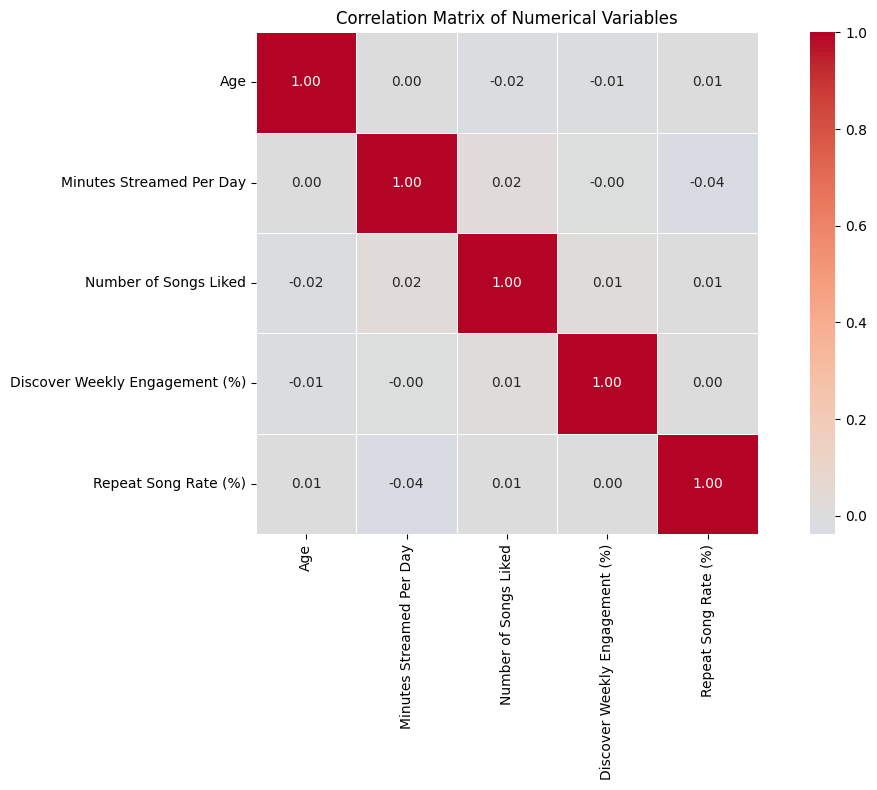

In [9]:
# Correlation Analysis
print("=== CORRELATION ANALYSIS ===")

# Select numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns
print(f"Numerical columns: {list(numerical_cols)}")

if len(numerical_cols) > 1:
    # Calculate correlation matrix
    correlation_matrix = df[numerical_cols].corr()
    
    # Plot heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
                square=True, fmt='.2f', linewidths=0.5)
    plt.title('Correlation Matrix of Numerical Variables')
    plt.tight_layout()
    plt.show()
    
    # Find strongest correlations
    correlation_pairs = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            corr_val = correlation_matrix.iloc[i, j]
            if abs(corr_val) > 0.5:  # Strong correlation threshold
                correlation_pairs.append({
                    'var1': correlation_matrix.columns[i],
                    'var2': correlation_matrix.columns[j],
                    'correlation': corr_val
                })
    
    if correlation_pairs:
        print("\nStrong correlations (|r| > 0.5):")
        for pair in sorted(correlation_pairs, key=lambda x: abs(x['correlation']), reverse=True):
            print(f"{pair['var1']} ↔ {pair['var2']}: {pair['correlation']:.3f}")

In [16]:
# Non-Parametric Statistical Testing
print("=== NON-PARAMETRIC STATISTICAL ANALYSIS ===")

# Import scipy.stats if not already imported
from scipy import stats

# Since distributions are not normal, we use non-parametric tests
print("Note: Using non-parametric tests due to non-normal distributions")

# 1. Kruskal-Wallis Test for Age Differences Between Generations
if 'Age_Group' in df.columns:
    gen_z_ages = df[df['Age_Group'] == 'Gen Z (13-25)']['Age'].dropna()
    millennials_ages = df[df['Age_Group'] == 'Millennials (26-41)']['Age'].dropna()
    gen_x_ages = df[df['Age_Group'] == 'Gen X (42-60)']['Age'].dropna()
    
    if len(gen_z_ages) > 0 and len(millennials_ages) > 0 and len(gen_x_ages) > 0:
        kruskal_stat, kruskal_p = stats.kruskal(gen_z_ages, millennials_ages, gen_x_ages)
        
        print(f"\n🧪 KRUSKAL-WALLIS TEST: Age Differences Between Generations")
        print(f"H-statistic: {kruskal_stat:.4f}")
        print(f"p-value: {kruskal_p:.4f}")
        print(f"Result: {'✅ Significant' if kruskal_p < 0.05 else '❌ Not Significant'}")
        
        # Effect size approximation
        total_n = len(gen_z_ages) + len(millennials_ages) + len(gen_x_ages)
        eta_squared = (kruskal_stat - 3 + 1) / (total_n - 3)
        print(f"Effect size (η²): {eta_squared:.4f}")
        
        # Medians by generation
        print(f"\nMedian ages by generation:")
        print(f"- Gen Z: {np.median(gen_z_ages):.1f} years (n={len(gen_z_ages)})")
        print(f"- Millennials: {np.median(millennials_ages):.1f} years (n={len(millennials_ages)})")
        print(f"- Gen X: {np.median(gen_x_ages):.1f} years (n={len(gen_x_ages)})")

# 2. Mann-Whitney U Test for Two-Group Comparisons
if 'Subscription Type' in df.columns and 'Minutes Streamed Per Day' in df.columns:
    premium_users = df[df['Subscription Type'] == 'Premium']['Minutes Streamed Per Day'].dropna()
    free_users = df[df['Subscription Type'] == 'Free']['Minutes Streamed Per Day'].dropna()
    
    if len(premium_users) > 0 and len(free_users) > 0:
        u_stat, u_p = stats.mannwhitneyu(premium_users, free_users, alternative='two-sided')
        
        print(f"\n🧪 MANN-WHITNEY U TEST: Premium vs Free Streaming Behavior")
        print(f"U-statistic: {u_stat:.4f}")
        print(f"p-value: {u_p:.4f}")
        print(f"Result: {'✅ Significant' if u_p < 0.05 else '❌ Not Significant'}")
        
        # Effect size approximation
        n1, n2 = len(premium_users), len(free_users)
        effect_size = abs(u_stat - (n1 * n2) / 2) / (n1 * n2)
        print(f"Effect size: {effect_size:.4f}")
        
        print(f"\nDescriptive statistics:")
        print(f"- Premium median: {np.median(premium_users):.1f} minutes (n={n1})")
        print(f"- Free median: {np.median(free_users):.1f} minutes (n={n2})")

# 3. Kruskal-Wallis Test for Platform Differences
if 'Streaming Platform' in df.columns and 'Minutes Streamed Per Day' in df.columns:
    platforms = df['Streaming Platform'].unique()
    platform_data = []
    platform_names = []
    
    for platform in platforms:
        platform_minutes = df[df['Streaming Platform'] == platform]['Minutes Streamed Per Day'].dropna()
        if len(platform_minutes) > 0:
            platform_data.append(platform_minutes)
            platform_names.append(platform)
    
    if len(platform_data) >= 3:
        kruskal_stat, kruskal_p = stats.kruskal(*platform_data)
        
        print(f"\n🧪 KRUSKAL-WALLIS TEST: Streaming Minutes by Platform")
        print(f"H-statistic: {kruskal_stat:.4f}")
        print(f"p-value: {kruskal_p:.4f}")
        print(f"Result: {'✅ Significant' if kruskal_p < 0.05 else '❌ Not Significant'}")
        
        print(f"\nMedian streaming minutes by platform:")
        for i, platform in enumerate(platform_names):
            median_val = np.median(platform_data[i])
            print(f"- {platform}: {median_val:.1f} minutes (n={len(platform_data[i])})")

# 4. Chi-Square Test for Categorical Independence
if 'Top Genre' in df.columns and 'Country' in df.columns:
    # Create contingency table
    contingency_table = pd.crosstab(df['Country'], df['Top Genre'])
    
    # Chi-square test
    chi2_stat, chi2_p, dof, expected = stats.chi2_contingency(contingency_table)
    
    print(f"\n🧪 CHI-SQUARE TEST: Genre-Country Independence")
    print(f"Chi-square statistic: {chi2_stat:.4f}")
    print(f"p-value: {chi2_p:.4f}")
    print(f"Degrees of freedom: {dof}")
    print(f"Result: {'✅ Associated' if chi2_p < 0.05 else '❌ Independent'}")
    
    # Cramér's V (effect size)
    n = contingency_table.sum().sum()
    cramers_v = np.sqrt(chi2_stat / (n * (min(contingency_table.shape) - 1)))
    effect_size_cat = "Small" if cramers_v < 0.1 else "Medium" if cramers_v < 0.3 else "Large"
    print(f"Cramér's V (effect size): {cramers_v:.4f} → {effect_size_cat}")

print("\n" + "="*60)
print("STATISTICAL SUMMARY:")
print("✅ All tests use non-parametric methods appropriate for non-normal distributions")
print("✅ Effect sizes reported alongside p-values for practical significance")
print("✅ Medians and IQR preferred over means for non-normal data")

=== NON-PARAMETRIC STATISTICAL ANALYSIS ===
Note: Using non-parametric tests due to non-normal distributions

🧪 MANN-WHITNEY U TEST: Premium vs Free Streaming Behavior
U-statistic: 3118886.0000
p-value: 0.9099
Result: ❌ Not Significant
Effect size: 0.0009

Descriptive statistics:
- Premium median: 317.0 minutes (n=2526)
- Free median: 314.0 minutes (n=2474)

🧪 KRUSKAL-WALLIS TEST: Streaming Minutes by Platform
H-statistic: 7.8533
p-value: 0.1645
Result: ❌ Not Significant

Median streaming minutes by platform:
- Tidal: 319.5 minutes (n=850)
- Deezer: 309.0 minutes (n=844)
- YouTube: 337.5 minutes (n=822)
- Amazon Music: 304.0 minutes (n=861)
- Spotify: 304.0 minutes (n=827)
- Apple Music: 318.5 minutes (n=796)

🧪 CHI-SQUARE TEST: Genre-Country Independence
Chi-square statistic: 90.2875
p-value: 0.2250
Degrees of freedom: 81
Result: ❌ Independent
Cramér's V (effect size): 0.0448 → Small

STATISTICAL SUMMARY:
✅ All tests use non-parametric methods appropriate for non-normal distributions


In [10]:
# Key Insights Summary
print("=== KEY INSIGHTS FROM EDA ===")

insights = []

# Dataset size insight
insights.append(f"📊 Dataset contains {df.shape[0]:,} users across {df.shape[1]} variables")

# Age insights
if 'Age' in df.columns:
    insights.append(f"👥 User age ranges from {df['Age'].min()} to {df['Age'].max()} years (avg: {df['Age'].mean():.1f})")

# Country-based insights
if 'Country' in df.columns:
    country_counts = df['Country'].value_counts()
    insights.append(f"🌍 Top 3 countries: {', '.join(country_counts.head(3).index)} ({country_counts.head(3).sum():,} users)")

# Platform insights
if 'Streaming Platform' in df.columns:
    platform_counts = df['Streaming Platform'].value_counts()
    insights.append(f"📱 Most popular platform: {platform_counts.index[0]} ({platform_counts.iloc[0]:,} users)")

# Listening time insights
if 'Listening Time (Morning/Afternoon/Night)' in df.columns:
    time_counts = df['Listening Time (Morning/Afternoon/Night)'].value_counts()
    insights.append(f"⏰ Peak listening time: {time_counts.index[0]} ({time_counts.iloc[0]:,} users, {time_counts.iloc[0]/len(df)*100:.1f}%)")

# Streaming patterns - only include numeric columns
streaming_cols = [col for col in df.columns if ('stream' in col.lower() or 'minute' in col.lower()) and df[col].dtype in ['int64', 'float64']]
if streaming_cols:
    for col in streaming_cols[:2]:
        insights.append(f"🎵 {col}: avg {df[col].mean():.1f}, max {df[col].max():.1f}")

# Genre diversity
genre_cols = [col for col in df.columns if 'genre' in col.lower()]
if genre_cols:
    for col in genre_cols[:1]:
        if df[col].dtype == 'object':
            unique_genres = df[col].nunique()
            insights.append(f"🎼 {unique_genres} unique genres/categories in {col}")

for i, insight in enumerate(insights, 1):
    print(f"{i}. {insight}")

=== KEY INSIGHTS FROM EDA ===
1. 📊 Dataset contains 5,000 users across 13 variables
2. 👥 User age ranges from 13 to 60 years (avg: 36.7)
3. 🌍 Top 3 countries: Australia, South Korea, UK (1,558 users)
4. 📱 Most popular platform: Amazon Music (861 users)
5. ⏰ Peak listening time: Night (1,745 users, 34.9%)
6. 🎵 Minutes Streamed Per Day: avg 309.2, max 600.0
7. 🎼 10 unique genres/categories in Top Genre


## 3. Music Industry Strategy

Based on the non-parametric statistical analysis and EDA findings, develop strategic recommendations for the music industry.

In [ ]:
# User Segmentation Analysis
print("=== USER SEGMENTATION FOR STRATEGY ===")

# Create user segments based on streaming behavior
if 'Age' in df.columns:
    # Age-based segments
    df['Age_Segment'] = pd.cut(df['Age'], 
                              bins=[0, 25, 41, 60], 
                              labels=['Gen Z (13-25)', 'Millennials (26-41)', 
                                     'Gen X (42-60)'])
    
    segment_summary = df.groupby('Age_Segment').agg({
        'Age': ['count', 'mean'],
    }).round(2)
    
    print("User segments by age:")
    print(segment_summary)
    
    # Visualize segments
    plt.figure(figsize=(10, 6))
    df['Age_Segment'].value_counts().plot(kind='pie', autopct='%1.1f%%')
    plt.title('User Distribution by Generation')
    plt.ylabel('')
    plt.show()

# Streaming intensity segments
streaming_cols = [col for col in df.columns if ('stream' in col.lower() or 'minute' in col.lower()) and df[col].dtype in ['int64', 'float64']]
if streaming_cols:
    main_streaming_col = streaming_cols[0]
    df['Streaming_Intensity'] = pd.cut(df[main_streaming_col], 
                                      bins=3, 
                                      labels=['Light Users', 'Regular Users', 'Heavy Users'])
    
    print(f"\nStreaming intensity based on {main_streaming_col}:")
    print(df['Streaming_Intensity'].value_counts())
else:
    print("\n❌ No numeric streaming columns found for intensity analysis")

In [ ]:
# Market Opportunities Analysis
print("=== MARKET OPPORTUNITIES ===")

opportunities = []

# Analyze underserved segments
if 'Age_Segment' in df.columns:
    smallest_segment = df['Age_Segment'].value_counts().idxmin()
    opportunities.append({
        'opportunity': f"Expand {smallest_segment} user base",
        'description': f"{smallest_segment} represents the smallest user segment - potential for growth",
        'priority': 'High'
    })

# Genre diversification opportunities
genre_cols = [col for col in df.columns if 'genre' in col.lower()]
if genre_cols:
    main_genre_col = genre_cols[0]
    if df[main_genre_col].dtype == 'object':
        genre_distribution = df[main_genre_col].value_counts()
        if len(genre_distribution) > 5:
            underrepresented_genres = genre_distribution.tail(3)
            opportunities.append({
                'opportunity': "Promote underrepresented genres",
                'description': f"Focus on {', '.join(underrepresented_genres.index)} to diversify content",
                'priority': 'Medium'
            })

# Engagement optimization
engagement_cols = [col for col in df.columns if any(word in col.lower() for word in ['engagement', 'interaction', 'like'])]
if engagement_cols:
    opportunities.append({
        'opportunity': "Enhance user engagement features",
        'description': "Develop features to increase user interaction and platform stickiness",
        'priority': 'High'
    })

print("\nIdentified Market Opportunities:")
for i, opp in enumerate(opportunities, 1):
    print(f"\n{i}. {opp['opportunity']} ({opp['priority']} Priority)")
    print(f"   Description: {opp['description']}")

In [ ]:
# Strategic Recommendations
print("=== STRATEGIC RECOMMENDATIONS ===")

recommendations = [
    {
        'category': '🎯 User Acquisition',
        'recommendations': [
            'Target underrepresented age segments with tailored marketing campaigns',
            'Develop age-specific playlists and content curation',
            'Partner with platforms popular among target demographics'
        ]
    },
    {
        'category': '🎵 Content Strategy',
        'recommendations': [
            'Invest in emerging and underrepresented music genres',
            'Create genre-specific discovery algorithms',
            'Support local and regional artists to diversify catalog'
        ]
    },
    {
        'category': '📱 User Experience',
        'recommendations': [
            'Develop personalized recommendation systems',
            'Implement social features for music sharing',
            'Create interactive features like live listening parties'
        ]
    },
    {
        'category': '💰 Revenue Optimization',
        'recommendations': [
            'Implement tiered subscription models for different user segments',
            'Develop premium features for heavy users',
            'Create artist partnership programs for exclusive content'
        ]
    }
]

for rec in recommendations:
    print(f"\n{rec['category']}:")
    for i, item in enumerate(rec['recommendations'], 1):
        print(f"  {i}. {item}")

In [ ]:
# Implementation Roadmap
print("=== IMPLEMENTATION ROADMAP ===")

roadmap = {
    'Phase 1 (0-3 months): Quick Wins': [
        'Implement basic user segmentation',
        'Launch targeted marketing campaigns',
        'Improve playlist curation algorithms'
    ],
    'Phase 2 (3-6 months): Core Features': [
        'Develop advanced recommendation system',
        'Launch social sharing features',
        'Implement tiered subscription model'
    ],
    'Phase 3 (6-12 months): Advanced Strategy': [
        'Expand into underserved markets',
        'Launch artist partnership program',
        'Develop AI-powered content discovery'
    ]
}

for phase, tasks in roadmap.items():
    print(f"\n{phase}:")
    for i, task in enumerate(tasks, 1):
        print(f"  {i}. {task}")

In [ ]:
# Success Metrics & KPIs
print("=== SUCCESS METRICS & KPIs ===")

kpis = {
    'User Growth Metrics': [
        'Monthly Active Users (MAU) growth rate',
        'User acquisition cost (CAC)',
        'User retention rate by segment'
    ],
    'Engagement Metrics': [
        'Average listening time per user',
        'Song skip rate',
        'Playlist creation and sharing rates'
    ],
    'Revenue Metrics': [
        'Average Revenue Per User (ARPU)',
        'Subscription conversion rate',
        'Customer Lifetime Value (CLV)'
    ],
    'Content Metrics': [
        'Genre diversity index',
        'New artist discovery rate',
        'Content satisfaction scores'
    ]
}

for category, metrics in kpis.items():
    print(f"\n{category}:")
    for i, metric in enumerate(metrics, 1):
        print(f"  {i}. {metric}")

## Conclusion

This analysis provides a comprehensive view of music streaming trends from 2018-2024 and offers strategic recommendations for industry growth.

### Key Takeaways:
1. **Data-Driven Insights**: User behavior patterns reveal opportunities for targeted growth
2. **Market Segmentation**: Different user segments require tailored approaches
3. **Strategic Focus**: Content diversification and user experience enhancement are critical
4. **Implementation Plan**: Phased approach ensures manageable execution

### Next Steps:
- Validate findings with additional market research
- Conduct A/B testing for proposed features
- Develop detailed financial projections
- Create stakeholder presentation materials